In [457]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [458]:

c="all"
df = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_good_policy")
df_no_outliers = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_good_policy")
df_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_bad_policy")
df_no_outliers_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_bad_policy")

on_policy = -339

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_bad = df_bad.describe()
df_no_outliers_stats_bad = df_no_outliers_bad.describe()

print(df_stats)
print(df_no_outliers_stats)

x = np.array([100, 300, 500, 700, 900])
concepts_color = "limegreen"
concepts_color_bad = "forestgreen"
vanilla_color = "lightsalmon"
vanilla_color_bad = "saddlebrown"

        100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count     10.000000     10.000000    10.000000     10.000000    10.000000   
mean   -5862.116775   -560.722709 -2031.012776   -640.065315 -2087.642103   
std    13349.454190    172.492932   599.550341    211.764820   982.776129   
min   -43790.263748   -865.353533 -3166.927587  -1077.368241 -3808.743918   
25%    -2507.857542   -665.814597 -2406.771092   -650.547079 -2358.639115   
50%    -1695.368442   -554.252865 -1927.233068   -574.569124 -1684.507961   
75%    -1126.513648   -414.629499 -1620.688443   -499.034863 -1428.757353   
max     -479.519063   -333.470375 -1225.387430   -455.493152 -1207.078134   

       500_concepts  700_vanilla  700_concepts  900_vanilla  900_concepts  
count     10.000000    10.000000     10.000000    10.000000     10.000000  
mean    -675.653045 -2146.267355   -591.113380 -3334.736484   -776.393984  
std      297.992990  1655.237682    107.673028  1885.713673    187.495957  
mi

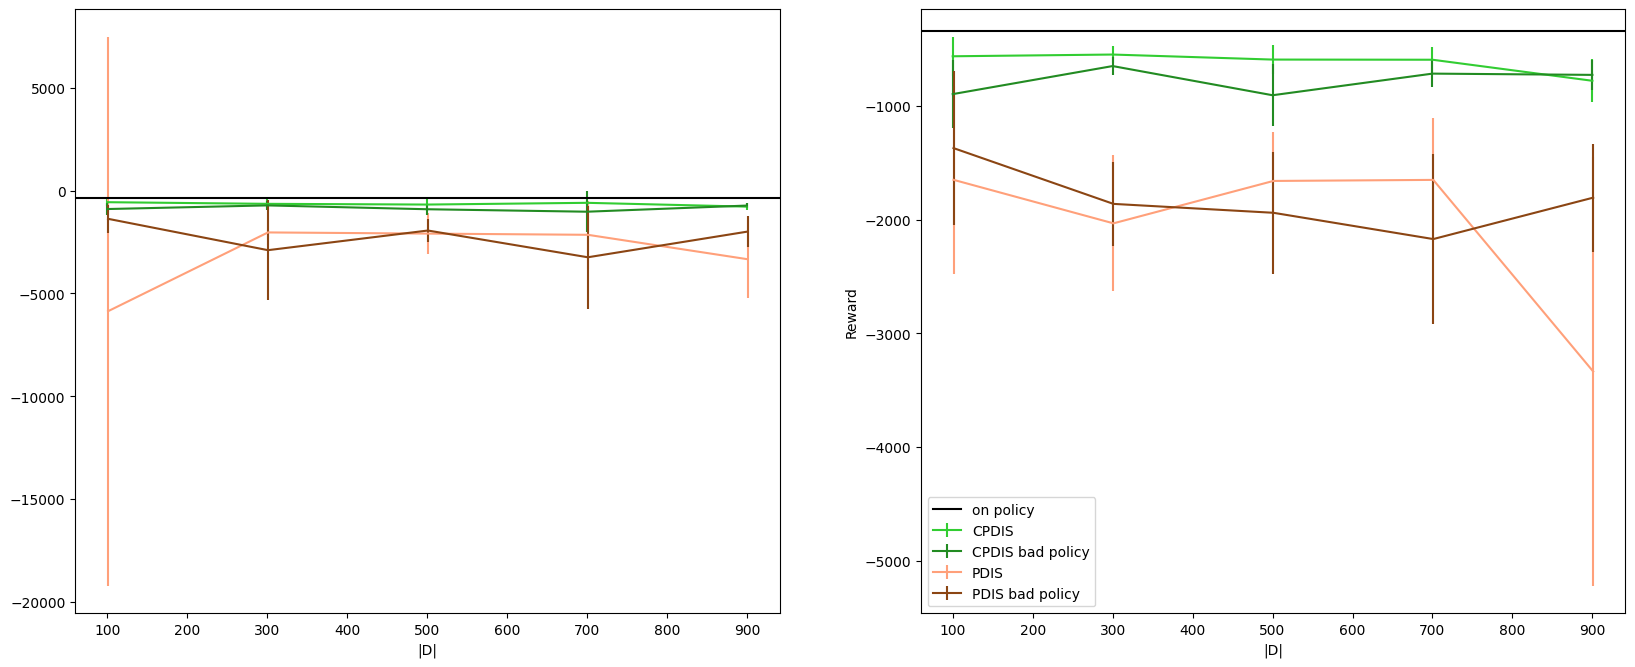

In [459]:
mean_estimates_vanilla = df_stats.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_stats.loc["mean"].filter(like="concepts")
std_vanilla = df_stats.loc["std"].filter(like="vanilla")
std_concepts = df_stats.loc["std"].filter(like="concepts")

mean_estimates_vanilla_bad = df_stats_bad.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_bad = df_stats_bad.loc["mean"].filter(like="concepts")
std_vanilla_bad = df_stats_bad.loc["std"].filter(like="vanilla")
std_concepts_bad = df_stats_bad.loc["std"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_stats.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_stats.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_stats.loc["std"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_stats.loc["std"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_bad = df_no_outliers_stats_bad.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_bad = df_no_outliers_stats_bad.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_bad = df_no_outliers_stats_bad.loc["std"].filter(like="vanilla")
std_concepts_no_outliers_bad = df_no_outliers_stats_bad.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(20,8), dpi=100)
plt.subplot(1,2,1)

plt.errorbar(x, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label='concepts good policy', color=concepts_color)
plt.errorbar(x+1, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label='states', color=vanilla_color)
plt.errorbar(x, mean_estimates_concepts_bad.to_list() , yerr=std_concepts_bad.to_list(), label='CPDIS bad policy', color=concepts_color_bad)
plt.errorbar(x+1, mean_estimates_vanilla_bad.to_list() , yerr=std_vanilla_bad.to_list(), label='PDIS bad policy', color=vanilla_color_bad)
plt.axhline(on_policy, label="on policy", color="black")
plt.xlabel("|D|")


plt.subplot(1,2,2)
plt.errorbar(x, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label='CPDIS', color=concepts_color)
plt.errorbar(x, mean_estimates_concepts_no_outliers_bad.to_list() , yerr=std_concepts_no_outliers_bad.to_list(), label='CPDIS bad policy', color=concepts_color_bad)
plt.errorbar(x+1, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label='PDIS', color=vanilla_color)
plt.errorbar(x+1, mean_estimates_vanilla_no_outliers_bad.to_list() , yerr=std_vanilla_no_outliers_bad.to_list(), label='PDIS bad policy', color=vanilla_color_bad)
plt.axhline(on_policy, label="on policy", color="black")
plt.xlabel("|D|")


plt.ylabel("Reward")
plt.legend()
plt.show()

## Bias Plots

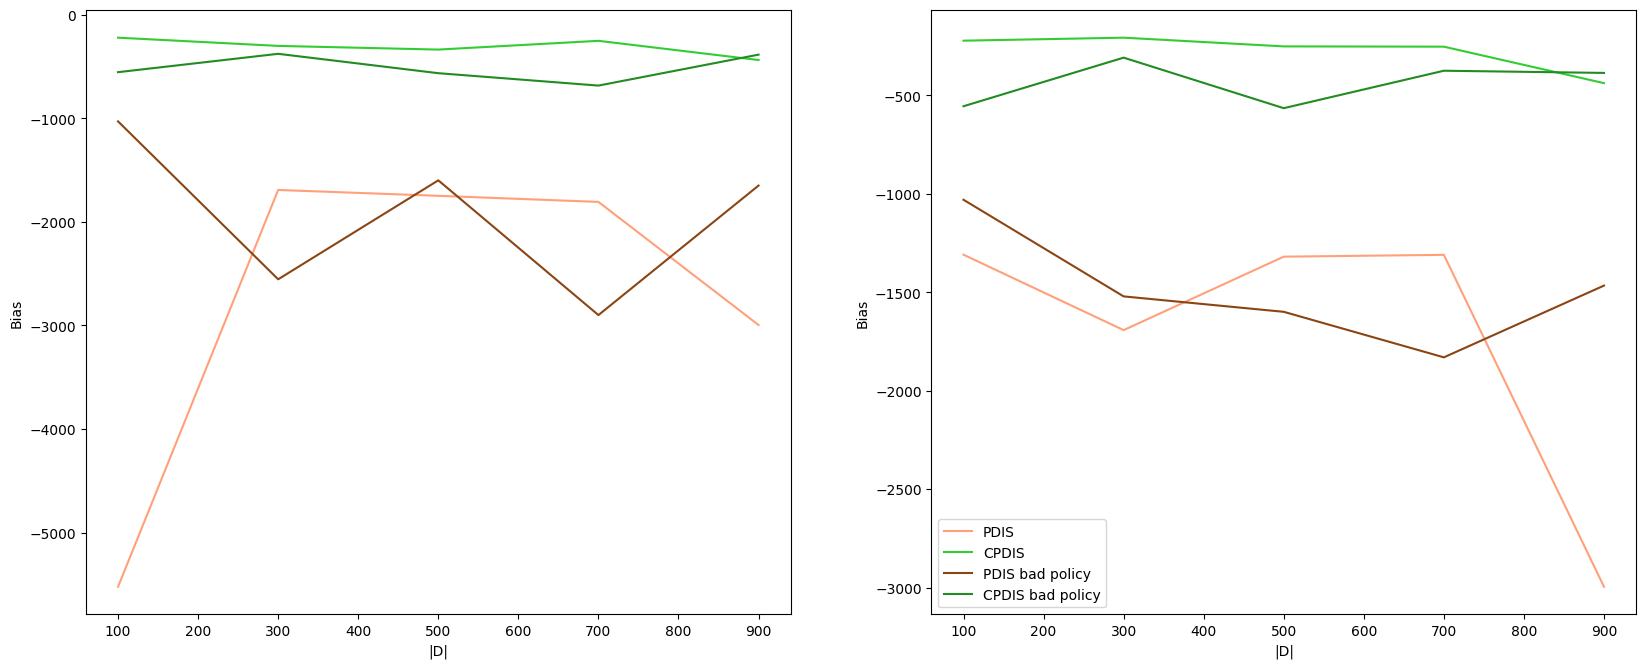

In [460]:

bias_vanilla = mean_estimates_vanilla - on_policy
bias_concepts = mean_estimates_concepts - on_policy
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy

bias_vanilla_bad = mean_estimates_vanilla_bad - on_policy
bias_concepts_bad = mean_estimates_concepts_bad - on_policy
bias_vanilla_no_outliers_bad = mean_estimates_vanilla_no_outliers_bad - on_policy
bias_concepts_no_outliers_bad = mean_estimates_concepts_no_outliers_bad - on_policy



fig = plt.figure(figsize=(20,8), dpi=100)
plt.subplot(1,2,1)
plt.plot(x, bias_vanilla, label="PDIS", color=vanilla_color)
plt.plot(x, bias_concepts, label="CPDIS", color=concepts_color)
plt.plot(x, bias_vanilla_bad, label="PDIS bad policy", color=vanilla_color_bad)
plt.plot(x, bias_concepts_bad, label="CPDIS bad policy", color=concepts_color_bad)
plt.xlabel("|D|")
plt.ylabel("Bias")

plt.subplot(1,2,2)
plt.plot(x, bias_vanilla_no_outliers, label="PDIS", color=vanilla_color)
plt.plot(x, bias_concepts_no_outliers, label="CPDIS", color=concepts_color)
plt.plot(x, bias_vanilla_no_outliers_bad, label="PDIS bad policy", color=vanilla_color_bad)
plt.plot(x, bias_concepts_no_outliers_bad, label="CPDIS bad policy", color=concepts_color_bad)
plt.ylabel("Bias")
plt.xlabel("|D|")

plt.legend()
plt.show()


## Variance Plots

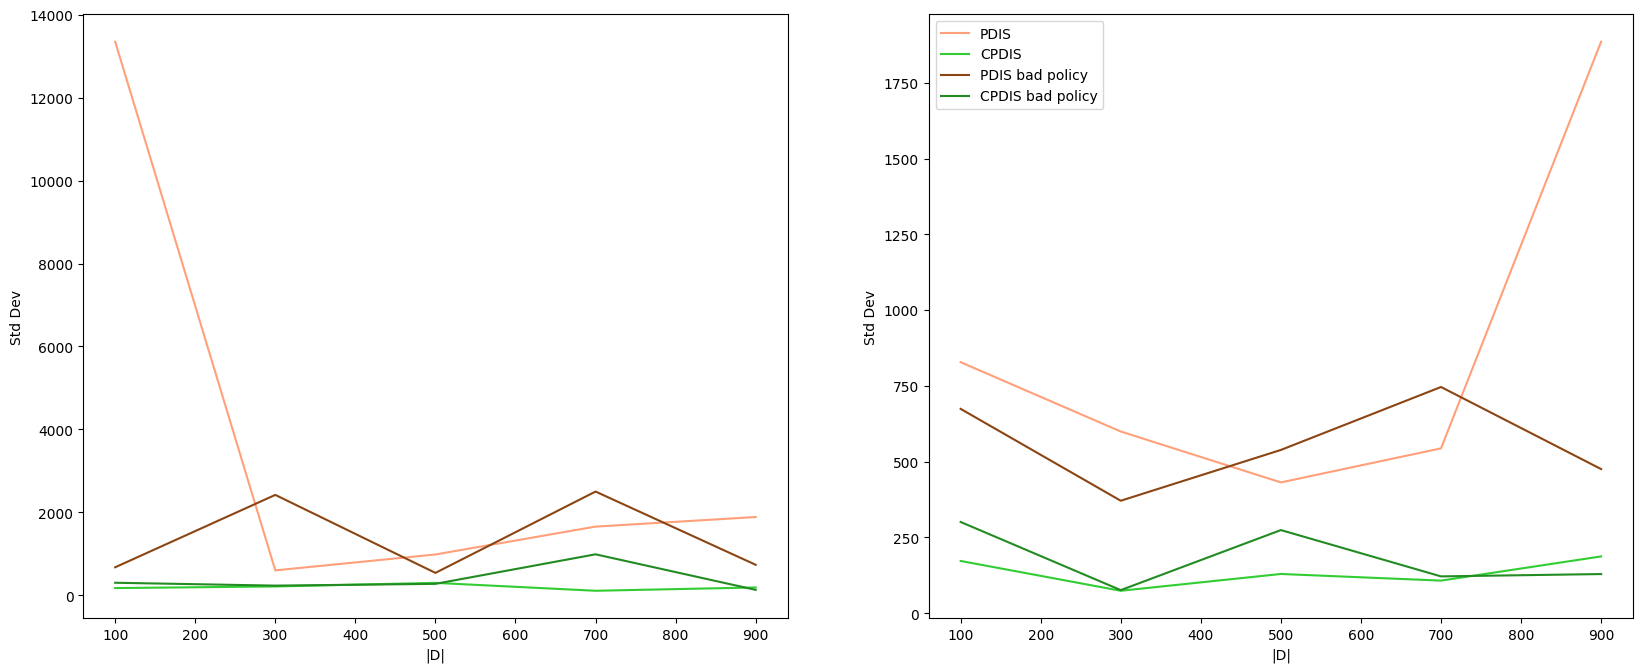

In [461]:
var_vanilla = std_vanilla
var_concepts = std_concepts
var_vanilla_no_outliers = std_vanilla_no_outliers
var_concepts_no_outliers = std_concepts_no_outliers
var_vanilla_bad = std_vanilla_bad
var_concepts_bad = std_concepts_bad
var_vanilla_no_outliers_bad = std_vanilla_no_outliers_bad
var_concepts_no_outliers_bad = std_concepts_no_outliers_bad

fig = plt.figure(figsize=(20,8), dpi=100)
plt.subplot(1,2,1)

plt.plot(x, var_vanilla, label="PDIS", color=vanilla_color)
plt.plot(x, var_concepts, label="CPDIS", color=concepts_color)
plt.plot(x, var_vanilla_bad, label="PDIS bad policy", color=vanilla_color_bad)
plt.plot(x, var_concepts_bad, label="CPDIS bad policy", color=concepts_color_bad)
plt.xlabel("|D|")
plt.ylabel("Std Dev")

plt.subplot(1,2,2)
plt.plot(x, var_vanilla_no_outliers, label="PDIS", color=vanilla_color)
plt.plot(x, var_concepts_no_outliers, label="CPDIS", color=concepts_color)
plt.plot(x, var_vanilla_no_outliers_bad, label="PDIS bad policy", color=vanilla_color_bad)
plt.plot(x, var_concepts_no_outliers_bad, label="CPDIS bad policy", color=concepts_color_bad)
plt.xlabel("|D|")
plt.ylabel("Std Dev")


plt.legend()
plt.show()


## MSE Plots

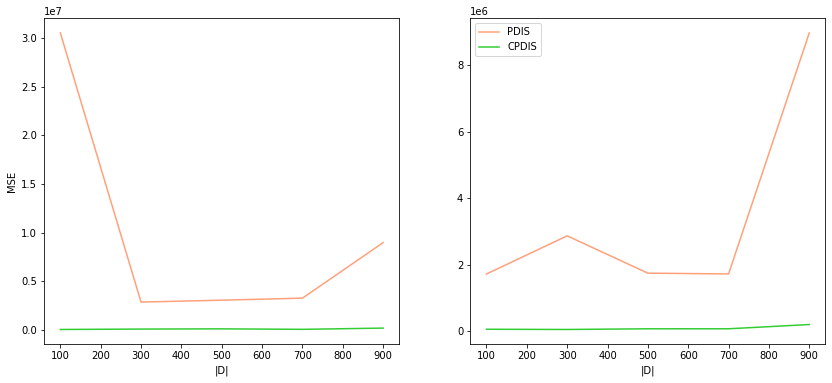

In [462]:
mse_vanilla = var_vanilla + bias_vanilla**2
mse_concepts = var_concepts + bias_concepts**2
mse_vanilla_no_outliers = var_vanilla_no_outliers + bias_vanilla_no_outliers**2
mse_concepts_no_outliers = var_concepts_no_outliers + bias_concepts_no_outliers**2

fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

plt.plot(x, mse_vanilla, label="PDIS", color=vanilla_color)
plt.plot(x, mse_concepts, label="CPDIS", color=concepts_color)
plt.xlabel("|D|")
plt.ylabel("MSE")

plt.subplot(1,2,2)
plt.plot(x, mse_vanilla_no_outliers, label="PDIS", color=vanilla_color)
plt.plot(x, mse_concepts_no_outliers, label="CPDIS", color=concepts_color)
plt.xlabel("|D|")


plt.legend()
plt.show()